In [1]:
import numpy as np

import pandas as pd

import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv("laptops.csv")

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
data = df.drop_duplicates()

In [6]:
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [15]:
data.drop(columns=["GPU"],inplace=True)

In [7]:
from skimpy import skim
skim(data)

ModuleNotFoundError: No module named 'skimpy'

In [ ]:
data.

<Axes: >

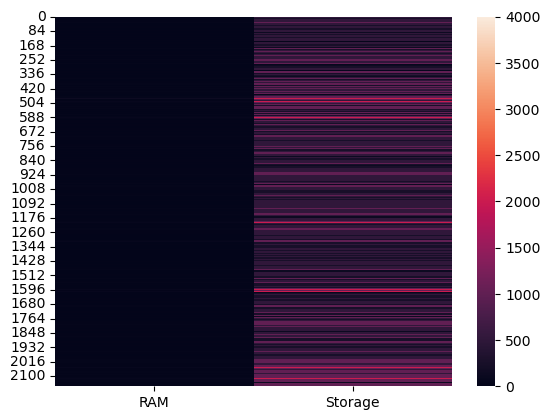

In [109]:
sns.heatmap(data.select_dtypes("int64","float64"))

In [16]:
Storage_type = data["Storage type"].value_counts()

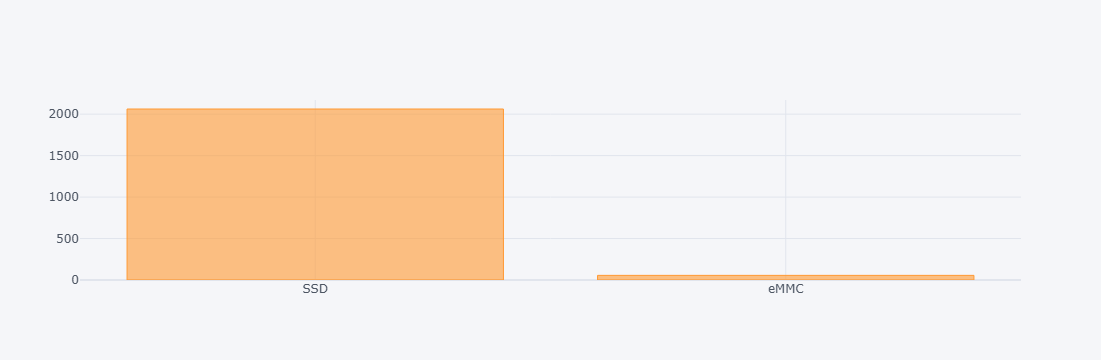

<Figure size 600x400 with 0 Axes>

In [17]:
plt.figure(figsize=(6,4))

Storage_type.iplot(kind="bar")

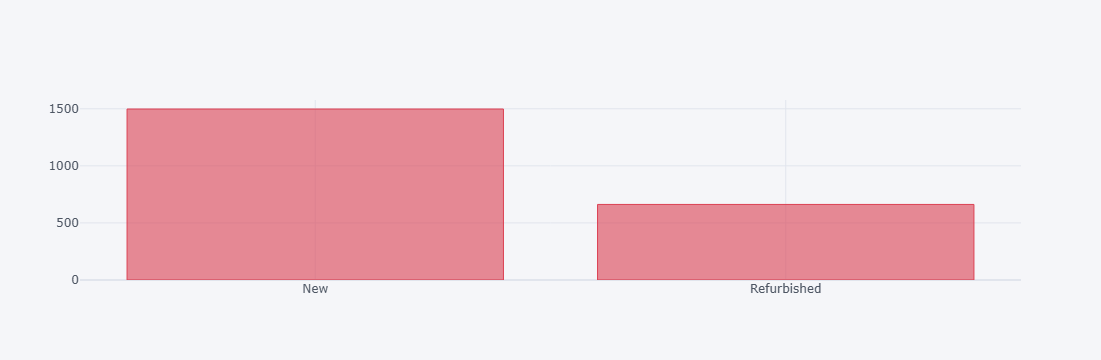

<Figure size 600x400 with 0 Axes>

In [21]:
status = data["Status"].value_counts()

plt.figure(figsize=(6,4))

status.iplot(kind="bar",color="red")

In [40]:
table = pd.crosstab(data["Status"],data["Storage type"],margins=True,normalize=True)

In [41]:
table

Storage type,SSD,eMMC,All
Status,,,
New,0.672805,0.023135,0.69594
Refurbished,0.300755,0.003305,0.30406
All,0.973560,0.026440,1.00000


In [62]:
table = pd.crosstab(data["Status"],data["Storage type"],values=df['RAM'], aggfunc='mean')

In [63]:
table

Storage type,SSD,eMMC
Status,,
New,15.09193,5.632653
Refurbished,17.44427,7.428571


In [79]:
proportion_table = round(table.div(table.sum(axis=1), axis=0)*100)

proportion_table

Storage type,SSD,eMMC
Status,,
New,73.0,27.0
Refurbished,70.0,30.0


<Axes: xlabel='Status'>

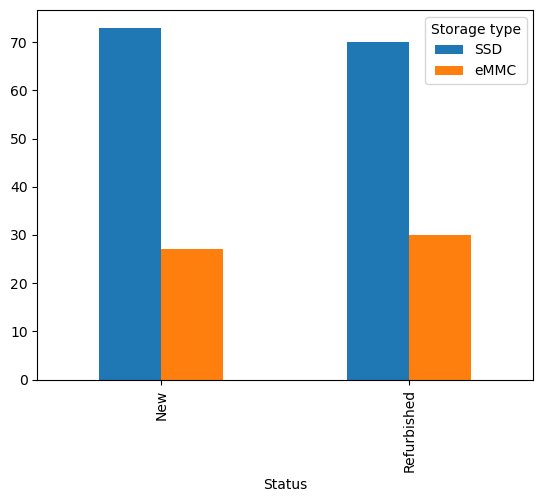

In [80]:
proportion_table.plot(kind="bar")

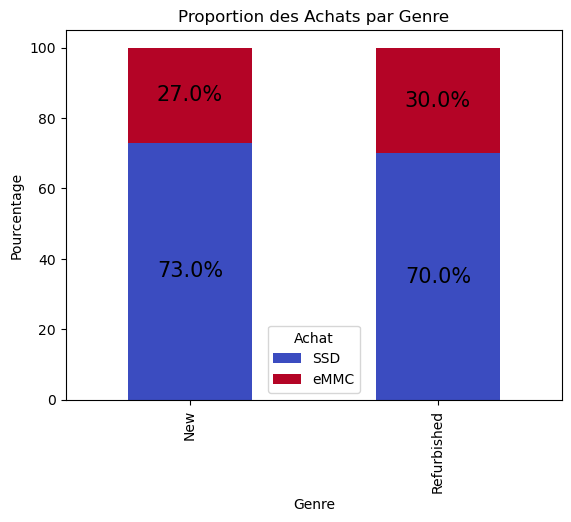

In [107]:
# Tracer le graphique
ax = proportion_table.plot(kind='bar', stacked=True, colormap='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f%%", label_type="center", color="black", fontsize=15)
# Ajouter un titre et labels
plt.title("Proportion des Achats par Genre")
plt.xlabel("Genre")
plt.ylabel("Pourcentage")
plt.legend(title="Achat")

# Afficher le graphique
plt.show()


In [96]:
cpu = data["CPU"].value_counts().head()

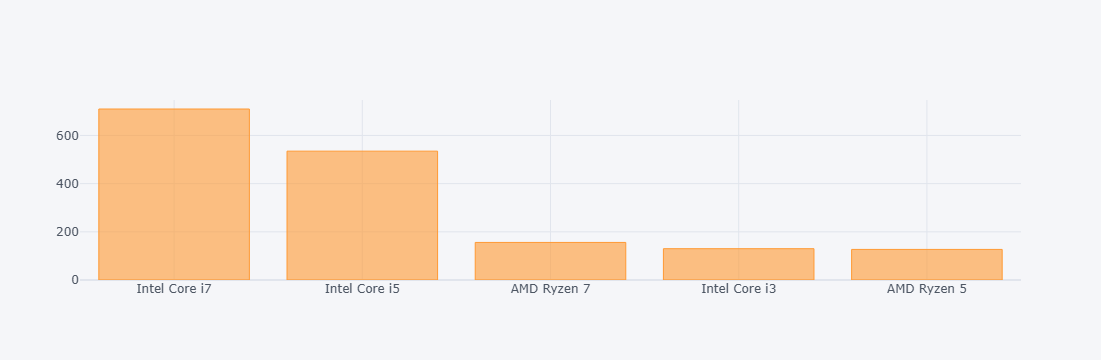

In [97]:
cpu.iplot(kind="bar")

In [104]:
mean_price = data.groupby(by=["Brand"])["Final Price"].mean()

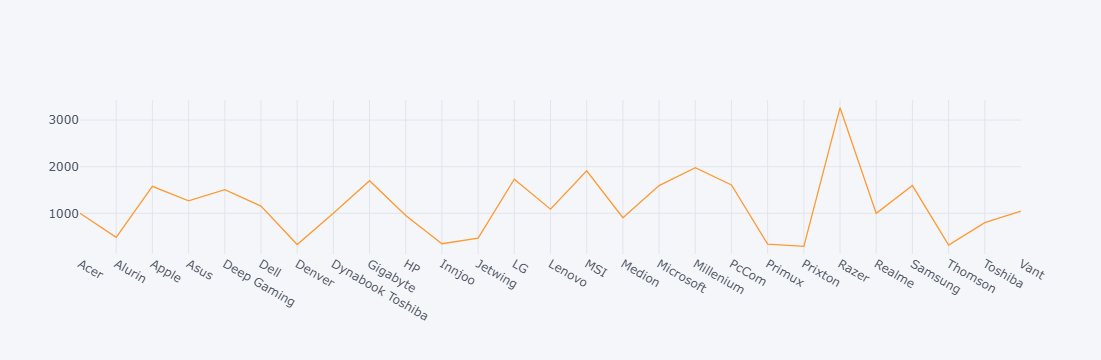

In [105]:
mean_price.iplot()